In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

2024-05-31 23:07:59.815267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def read_image(file_path):
    rgb_image = cv2.imread(file_path)
    return rgb_image

In [4]:
X = []
y = []

df = pd.read_csv('philarmonia_complete_features.csv')
dataset_path = "Philarmonia"
for index, row in tqdm(df.iterrows()):
    file_path = os.path.join(dataset_path + "/" + row["label"], row["filename"].split("\\")[-1].split(".")[0] + ".jpg").replace("\\", "/")
    try:
        image_rgb_matrix = read_image(file_path)
        image_rgb_matrix = image_rgb_matrix.astype('float32') / 255.0 # NORMALIZE RGB VALUES IN [0,1]
        label = row["label"]
        X.append(image_rgb_matrix)
        y.append(label)
    except:
        print("File error")
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

12180it [00:15, 759.81it/s][ WARN:0@20.006] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_A3_1_forte_arco-normal.jpg'): can't open/read file: check file path/integrity
12332it [00:16, 735.81it/s]

File error


13476it [00:17, 715.00it/s][ WARN:0@21.896] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_pianissimo_arco-normal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21.896] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_arco-col-legno-battuto.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21.897] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_arco-normal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21.897] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_pizz-normal.jpg'): can't open/read file: check file path/integrity
13558it [00:17, 743.48it/s][ WARN:0@21.926] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_phrase_forte_arco-martele.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21.926] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/

File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error

In [5]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
len(labelencoder.classes_)

# To see the mapping, you can create a dictionary using the classes_ attribute
label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'banjo': 0, 'bass_clarinet': 1, 'bassoon': 2, 'cello': 3, 'clarinet': 4, 'contrabassoon': 5, 'cor_anglais': 6, 'double_bass': 7, 'flute': 8, 'french_horn': 9, 'guitar': 10, 'mandolin': 11, 'oboe': 12, 'percussion': 13, 'saxophone': 14, 'trombone': 15, 'trumpet': 16, 'tuba': 17, 'viola': 18, 'violin': 19}


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(10861, 130, 128, 3)
(10861,)
(2716, 130, 128, 3)
(2716,)


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(130, 128, 3))
for layer in base_model.layers:
    layer.trainable = True

model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(20, activation='softmax')
    ])
optimizer = Adam(learning_rate=0.00001)
model.summary()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model.save('philarmonia_full_resnet.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 24,117,396
Trainable params: 24,064,276
Non-trainable params: 53,120
_______________________________________

2024-05-31 23:08:27.747169: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2168724480 exceeds 10% of free system memory.


Epoch 1/10


2024-05-31 23:08:47.552500: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34078720 exceeds 10% of free system memory.
2024-05-31 23:08:47.623572: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34078720 exceeds 10% of free system memory.
2024-05-31 23:08:47.663766: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36225024 exceeds 10% of free system memory.
2024-05-31 23:08:47.673640: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34603008 exceeds 10% of free system memory.


340/340 [==============================] - 986s 3s/step - loss: 2.3369 - accuracy: 0.3196 - val_loss: 3.2448 - val_accuracy: 0.0582
Epoch 2/10
340/340 [==============================] - 953s 3s/step - loss: 1.0073 - accuracy: 0.7235 - val_loss: 3.0297 - val_accuracy: 0.1049
Epoch 3/10
340/340 [==============================] - 945s 3s/step - loss: 0.4497 - accuracy: 0.8817 - val_loss: 1.8680 - val_accuracy: 0.4628
Epoch 4/10
340/340 [==============================] - 936s 3s/step - loss: 0.2232 - accuracy: 0.9429 - val_loss: 0.1842 - val_accuracy: 0.9514
Epoch 5/10
340/340 [==============================] - 921s 3s/step - loss: 0.1232 - accuracy: 0.9713 - val_loss: 0.1222 - val_accuracy: 0.9683
Epoch 6/10
340/340 [==============================] - 934s 3s/step - loss: 0.0739 - accuracy: 0.9843 - val_loss: 0.1045 - val_accuracy: 0.9728
Epoch 7/10
340/340 [==============================] - 944s 3s/step - loss: 0.0478 - accuracy: 0.9908 - val_loss: 0.0855 - val_accuracy: 0.9768
Epoch 8/10

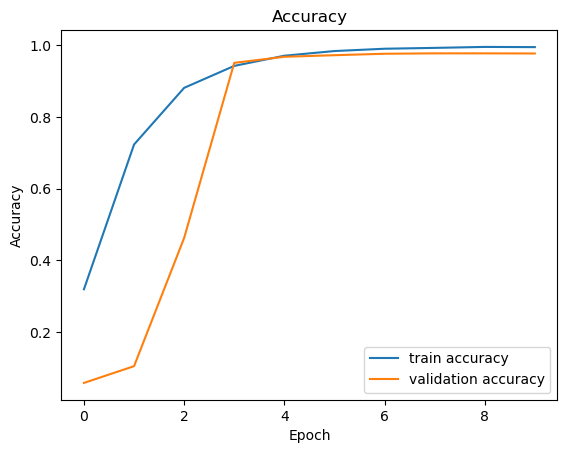

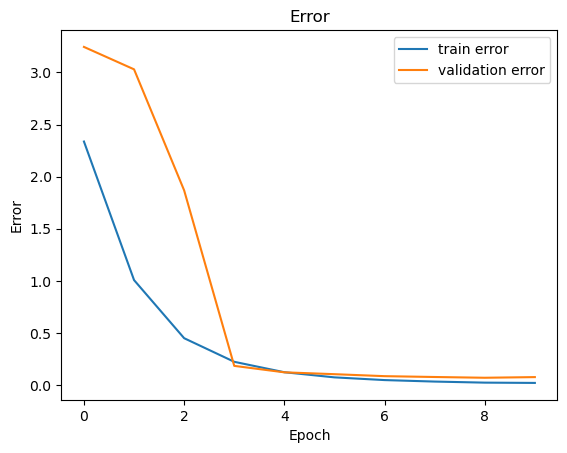

In [ ]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.savefig("phil_full_rn50_acc.png")
plt.show()

plt.figure(2)
plt.plot(history.history["loss"], label="train error")
plt.plot(history.history["val_loss"], label="validation error")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.title("Error")
plt.savefig("phil_full_rn50_loss.png")
plt.show()